In [1]:
# Modified by Felipe Tobar, 2025 - based on POT documentation.  
# Original author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License
# sphinx_gallery_thumbnail_number = 3

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss
from cycler import cycler
pl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
import time

### Generate Data

In [2]:
n = 300  # nb bins
r = n/3000
# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = 0.4*gauss(n, m=2000*r, s=200*r) + 0.6*gauss(n, m=500*r, s=150*r)  # m= mean, s= std
b = 0.7*gauss(n, m=1600*r, s=100*r) + 0.3*gauss(n, m=1000*r, s=200*r)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

### Plot distributions and loss matrix

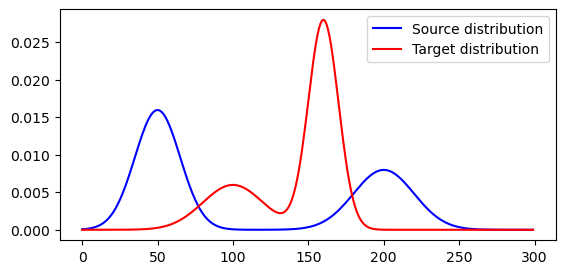

In [3]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, "b", label="Source distribution")
pl.plot(x, b, "r", label="Target distribution")
pl.legend()

(<Axes: >, <Axes: >, <Axes: >)

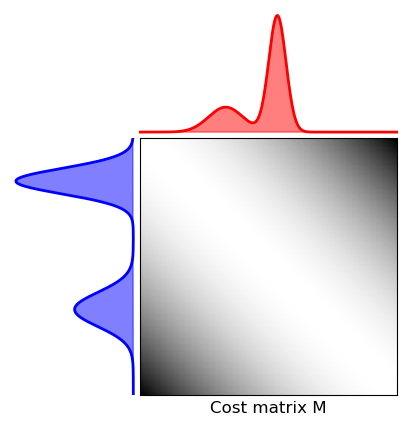

In [4]:
# Cost matrix
pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, "Cost matrix M")

### Solve using EMD (exact solution)

1738627870.647032
1738627870.670443


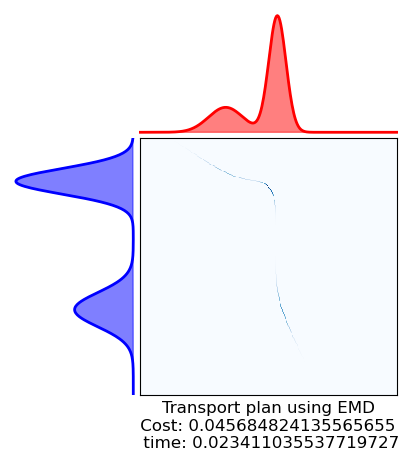

In [9]:
# use fast 1D solver
G0 = ot.emd_1d(x, x, a, b)

# Equivalent to
# G0 = ot.emd(a, b, M)

t0 = time.time()

c = ot.emd2(a, b, M, numItermax=200000)

tf = time.time()
print(t0)
print(tf)


pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, f"Transport plan using EMD\n Cost: {c} \n time: {tf-t0}", coupling_cmap='Blues')
pl.savefig('../img/EMD_vs_S1.pdf', bbox_inches='tight')

### Now using Sinkhorn

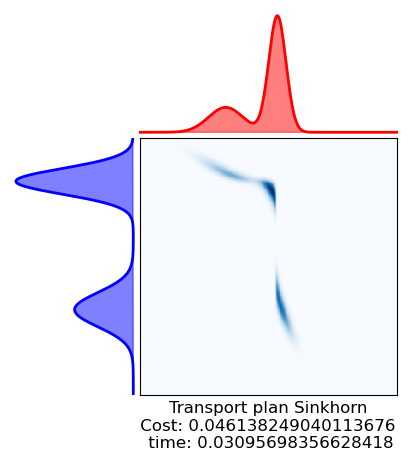

In [10]:
lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=False)

pl.figure(4, figsize=(5, 5))
t0 = time.time()
c = ot.sinkhorn2(a, b, M, lambd)
tf = time.time()
ot.plot.plot1D_mat(a, b, Gs, f"Transport plan Sinkhorn\n Cost: {c} \n time: {tf-t0}", coupling_cmap='Blues')


pl.savefig('../img/EMD_vs_S2.pdf', bbox_inches='tight')